In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ls=['A & N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI', 'DAMAN & DIU', 'DELHI UT', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL']

In [3]:
for i in range(35):
    print(i,ls[i])
print("\n\n\n","Enter Give Number to check crime in that State/UT")

0 A & N ISLANDS
1 ANDHRA PRADESH
2 ARUNACHAL PRADESH
3 ASSAM
4 BIHAR
5 CHANDIGARH
6 CHHATTISGARH
7 D & N HAVELI
8 DAMAN & DIU
9 DELHI UT
10 GOA
11 GUJARAT
12 HARYANA
13 HIMACHAL PRADESH
14 JAMMU & KASHMIR
15 JHARKHAND
16 KARNATAKA
17 KERALA
18 LAKSHADWEEP
19 MADHYA PRADESH
20 MAHARASHTRA
21 MANIPUR
22 MEGHALAYA
23 MIZORAM
24 NAGALAND
25 ODISHA
26 PUDUCHERRY
27 PUNJAB
28 RAJASTHAN
29 SIKKIM
30 TAMIL NADU
31 TRIPURA
32 UTTAR PRADESH
33 UTTARAKHAND
34 WEST BENGAL



 Enter Give Number to check crime in that State/UT


In [4]:
x=int(input("Input State Number"))
time1=int(input("Enter In 24 hrs formate"))

Input State Number33
Enter In 24 hrs formate12


In [5]:
ds2=pd.read_csv("main_data.csv")

In [6]:
ds2.head(5)

,Unnamed: 0,Unnamed: 0.1,STATE/UT,MURDER,RAPE,ROBBERY,RIOTS,StateLabel,Time
0,0,0,ANDHRA PRADESH,11,0,41,156,1,19
1,1,1,ANDHRA PRADESH,1,6,16,336,1,13
2,2,2,ANDHRA PRADESH,11,14,14,312,1,10
3,3,3,ANDHRA PRADESH,20,0,4,328,1,14
4,4,4,ANDHRA PRADESH,22,6,25,140,1,16


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
ds3=ds2[ds2["StateLabel"]==x]
x1=np.array(ds3["Time"])

time =np.array([time1])

x1.reshape(-1, 1)
X_train,X_test,y_train,y_test=train_test_split(x1.reshape(-1,1),ds3["MURDER"],random_state=100)
lr=LinearRegression()
lr.fit(X_train,y_train)
murder_per=round(lr.predict(time.reshape(-1,1))[0],2)
murder_per

21.18

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
ds3=ds2[ds2["StateLabel"]==x]
x1=np.array(ds3["Time"])

time =np.array([time1])

x1.reshape(-1, 1)
X_train,X_test,y_train,y_test=train_test_split(x1.reshape(-1,1),ds3["RAPE"],random_state=100)
lr=LinearRegression()
lr.fit(X_train,y_train)
rape_per=round(lr.predict(time.reshape(-1,1))[0],2)
rape_per

19.24

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
ds3=ds2[ds2["StateLabel"]==x]
x1=np.array(ds3["Time"])
time =np.array([time1])

x1.reshape(-1, 1)
X_train,X_test,y_train,y_test=train_test_split(x1.reshape(-1,1),ds3["ROBBERY"],random_state=100)
lr=LinearRegression()
lr.fit(X_train,y_train)
rob_per=round(lr.predict(time.reshape(-1,1))[0],2)
rob_per

12.65

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
ds3=ds2[ds2["StateLabel"]==x]
x1=np.array(ds3["Time"])

time =np.array([time1])

x1.reshape(-1, 1)
X_train,X_test,y_train,y_test=train_test_split(x1.reshape(-1,1),ds3["RIOTS"],random_state=100)
lr=LinearRegression()
lr.fit(X_train,y_train)
riots_per=round(lr.predict(time.reshape(-1,1))[0],2)
riots_per


57.52

In [12]:
y=ds2[ds2["StateLabel"]==x]
y=y[["MURDER","RAPE","ROBBERY","RIOTS"]]
temp=y.mean()
ts=temp.sum()
temp

MURDER     22.684524
RAPE       20.130952
ROBBERY    13.690476
RIOTS      63.827381
dtype: float64

In [13]:
murder=round((temp[0]/ts)*100,2)
rape=round((temp[1]/ts)*100,2)
robbery=round((temp[2]/ts)*100,2)
riots=round((temp[3]/ts)*100,2)
lis=ds2[ds2["StateLabel"]==x]["STATE/UT"]
ss=lis.head(1);
ss.index=[0]

In [14]:
print("murder","  rape","   robbery","  riots")
print(murder,rape,robbery,riots,"",sep='%    ')

murder   rape    robbery   riots
18.85%    16.73%    11.38%    53.04%    


Text(0.5, 1.0, 'UTTARAKHAND At 12')

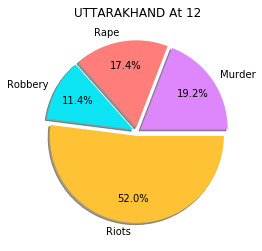

In [15]:
temp=[murder_per,rape_per,rob_per,riots_per]
explode = [0.05,0.05, 0.05,0.05]
labels=["Murder","Rape","Robbery","Riots"]
# x=[murder,rape,robbery,riots]
colors = ['#DE87FD','#FF7E7A', '#0CE4F3', '#FFC234']
plt.pie(temp, colors= colors, labels=labels, explode = explode,shadow=True,autopct='%1.1f%%',
counterclock=True,pctdistance=.72)

st1=ss[0]+" At "+str(time[0])
plt.title(st1)